In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"]=(12,8)

In [3]:
iris= pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#dropna values if null in whole row
iris.dropna(how='all', inplace=True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


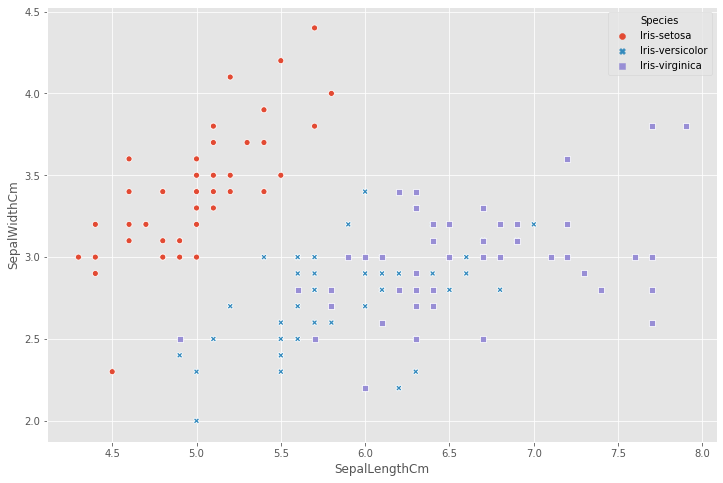

In [5]:
#Data Visualization
sns.scatterplot(x= iris.SepalLengthCm, y= iris.SepalWidthCm, hue= iris.Species, style=iris.Species)

### Data Standerdization

In [6]:
x= iris.iloc[:,1:5]
y= iris.Species.values

In [7]:
from sklearn.preprocessing import StandardScaler

x= StandardScaler().fit_transform(x)

### Eigen Vectors and Eigen Values

$Covariance(\sigma_{jk}) =\frac{1}{n-1} \sum \limits _{i=1} ^{n} (X_{ij} - \hat X_{j})(X_{ik} - \hat X_{k})$

$Covariance Matrix: \sum =\frac{1}{n-1} ((X - \hat X)^\intercal(X - \hat X))$

In [8]:
Covariance_matrix= np.cov(x.T)

$Eigen Decomposition of covariance matrix(\sum): W \cap W^{-1}$

In [9]:
eigen_values, eigen_vectors= np.linalg.eig(Covariance_matrix)
print('Eigen Vectors:', eigen_vectors,'\n')
print('Eigen Values:', eigen_values)

Eigen Vectors: [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen Values: [2.93035378 0.92740362 0.14834223 0.02074601]


### Single Value Decomposition(SVD)

In [10]:
eigen_vec_svd, s, v= np.linalg.svd(x.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [11]:
#Selecting Principle component using explained variance
variance_explained= [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380137, 23.03052326768062, 3.683831957627387, 0.5151926808906329]

In [12]:
cumalative_variance_explained= np.cumsum(variance_explained)
cumalative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

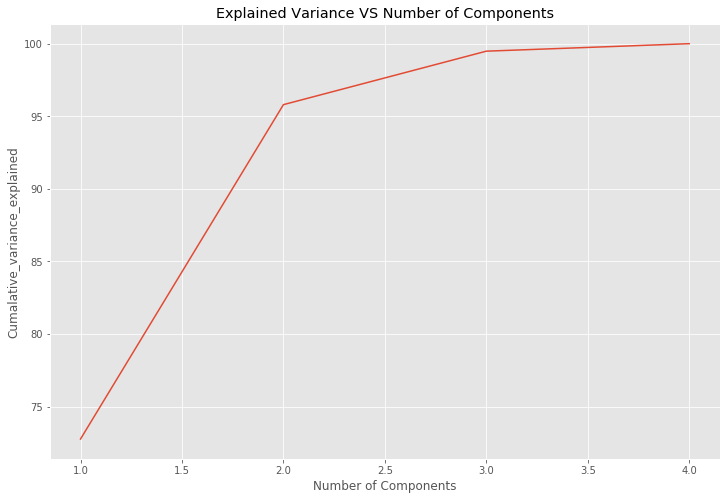

In [13]:
sns.lineplot(x=[1,2,3,4], y=cumalative_variance_explained)
plt.xlabel('Number of Components')
plt.ylabel('Cumalative_variance_explained')
plt.title('Explained Variance VS Number of Components')
plt.show()

### Project Data on Lower Dimensional Linear Subspace

$X_{pca}= X.W \\
X: Features \\
W: Eigen Vectors$

In [14]:
projection_matrix= (eigen_vectors.T)[:2].T
print(projection_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


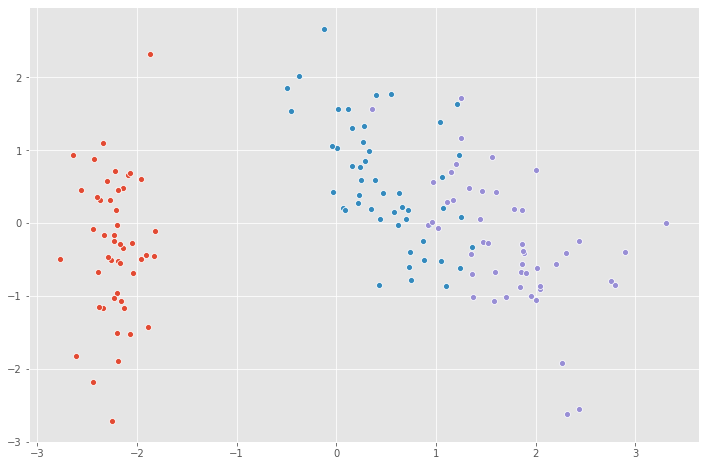

In [15]:
X_pca= x.dot(projection_matrix)
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
    sns.scatterplot(X_pca[y==species,0], X_pca[y==species,1])